In [35]:
# Capítulo 10
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [36]:
# ================================
# 1️⃣ Planta contínua
# ================================
G = ctrl.tf([1], [1, 2, 1])   # Planta contínua típica (2ª ordem)
print("G(s) contínua:")
print(G)


G(s) contínua:
<TransferFunction>: sys[171]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        1
  -------------
  s^2 + 2 s + 1


In [37]:
# ================================
# 2️⃣ Amostragem (T = 0.1s)
# ================================
Ts = 0.1

Gd = ctrl.sample_system(G, Ts, method="zoh")
Gd.dt = Ts    # <- ESSA LINHA RESOLVE TUDO
print(Gd)

<TransferFunction>: sys[171]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.1

  0.004679 z + 0.004377
  ---------------------
  z^2 - 1.81 z + 0.8187


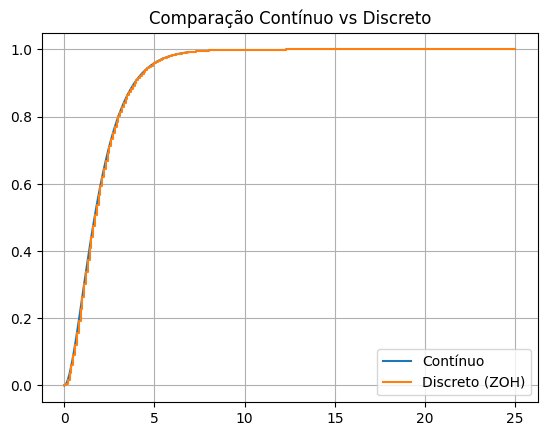

In [38]:
# ================================
# 3️⃣ Comparação das respostas
# ================================
t_cont, y_cont = ctrl.step_response(G)
t_disc, y_disc = ctrl.step_response(Gd)

plt.figure()
plt.plot(t_cont, y_cont, label="Contínuo")
plt.step(t_disc, y_disc, where='post', label="Discreto (ZOH)")
plt.title("Comparação Contínuo vs Discreto")
plt.grid(True)
plt.legend()
plt.show()

Polos discretos: [0.90483743+0.j 0.9048374 +0.j]


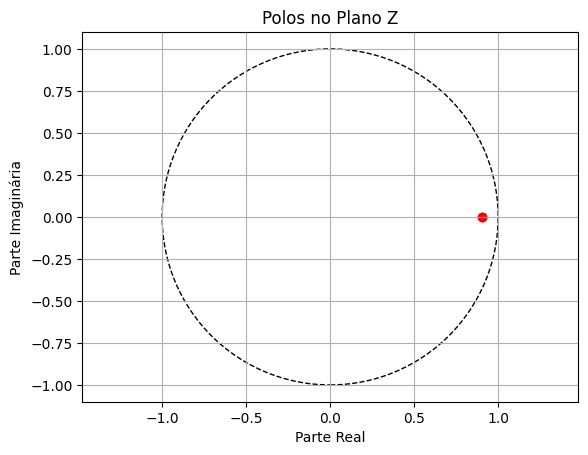

In [39]:
# ================================
# 4️⃣ Polos no plano Z
# ================================
poles = Gd.poles()
print("Polos discretos:", poles)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), color='red')
circle = plt.Circle((0, 0), 1, fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.title("Polos no Plano Z")
plt.grid(True)
plt.axis('equal')
plt.show()

Controlador PID digital C(z):
<TransferFunction>: sys[178]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.1

  4.05 z^2 - 5.95 z + 3.95
  ------------------------
           z - 1


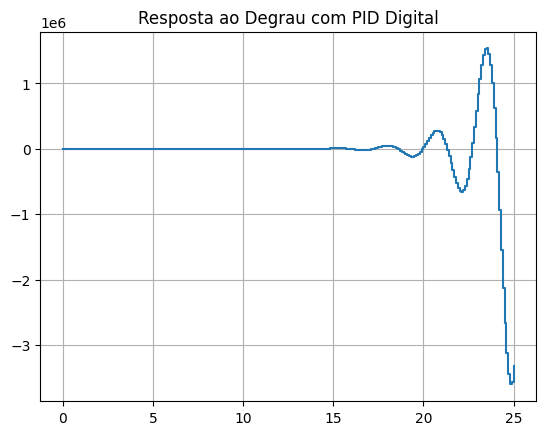

In [41]:
# ================================
# 5️⃣ PID digital (simples)
# ================================

Kp = 2
Ki = 1
Kd = 0.1
Ts = 0.1

# Transformação bilinear (Tustin)
a = 2/Ts

# Numerador e denominador do PID contínuo C(s) = Kd*s + Kp + Ki/s
# Após a substituição s = a(1 - z^-1)/(1 + z^-1):

b0 = Kp + Ki/a + Kd*a
b1 = -(Kp*2) + Ki/a - Kd*a
b2 = Kp - Ki/a + Kd*a

a0 = 1
a1 = -1

# C(z) = (b0 + b1 z^-1 + b2 z^-2) / (1 - z^-1)
# Adicionando dt=Ts para definir como sistema discreto
C_pid_d = ctrl.TransferFunction([b0, b1, b2], [1, -1], dt=Ts)

print("Controlador PID digital C(z):")
print(C_pid_d)

T_closed = ctrl.feedback(C_pid_d * Gd, 1)

t_d, y_d = ctrl.step_response(T_closed)

plt.figure()
plt.step(t_d, y_d, where='post')
plt.title("Resposta ao Degrau com PID Digital")
plt.grid(True)
plt.show()